<a href="https://colab.research.google.com/github/kumar-abhishek/imbalanced-machine-learning-book/blob/main/chapter-3/Code_under_sampling_used_in_chapter_3_docx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting helper function

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_dataset(X, y, label):
  X = pd.DataFrame(X, columns =['feature_1', 'feature_2'])
  y = pd.Series(y)  

  print(y.value_counts())

  markers = {1: "X", 0: "v"}
  sns.scatterplot(data=X, x ='feature_1', y='feature_2', hue=y, style=y, markers=markers)

  plt.title(label)
  plt.ylim(-5, 4)
  plt.xlim(-3, 3)

  plt.show()

# Create dataset

0    9900
1     100
dtype: int64


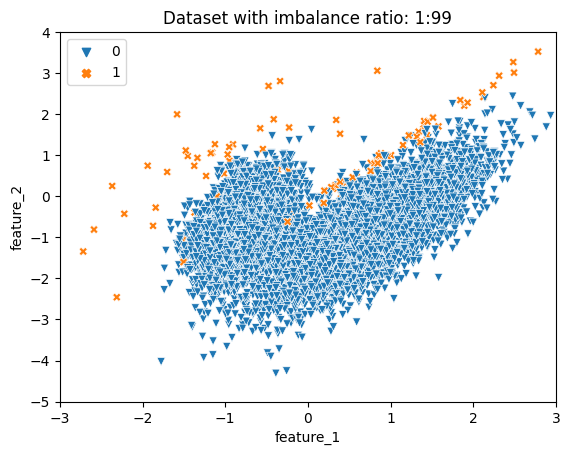

In [2]:
from sklearn.datasets import make_classification
import pandas as pd

X, y = make_classification(n_samples=10000, n_features=2, 
                          n_redundant=0, n_classes=2, flip_y=0,
                          n_clusters_per_class=2, class_sep=0.79,
                          weights=[0.99], random_state=81)

plot_dataset(X, y, 'Dataset with imbalance ratio: 1:99')


#RandomUnderSampler

Resampled dataset shape Counter({0: 100, 1: 100})
0    100
1    100
dtype: int64


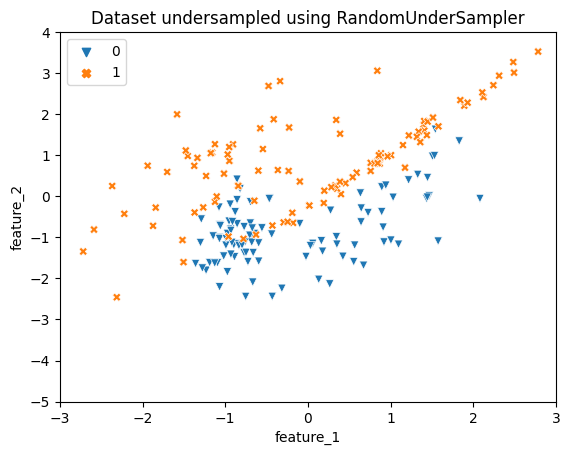

In [3]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

plot_dataset(X_res, y_res, 'Dataset undersampled using RandomUnderSampler')


#ClusterCentroids

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Resampled dataset shape Counter({0: 100, 1: 100})
0    100
1    100
dtype: int64


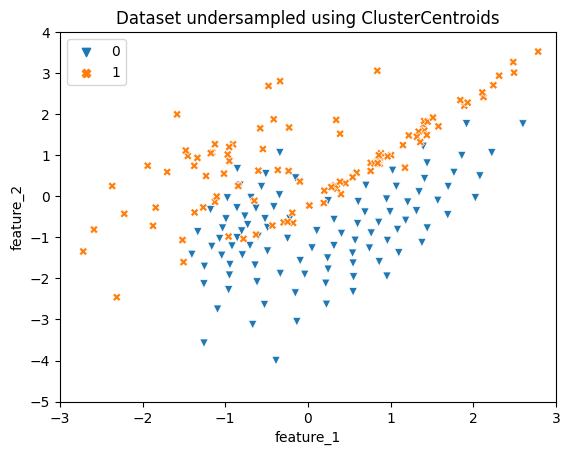

In [4]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=42)
X_res, y_res = cc.fit_resample(X,y)
print('Resampled dataset shape %s' % Counter(y_res))

plot_dataset(X_res, y_res, 'Dataset undersampled using ClusterCentroids')

# ENN, RENN, AllKNN

Resampled dataset shape Counter({0: 9781, 1: 100})
0    9781
1     100
dtype: int64


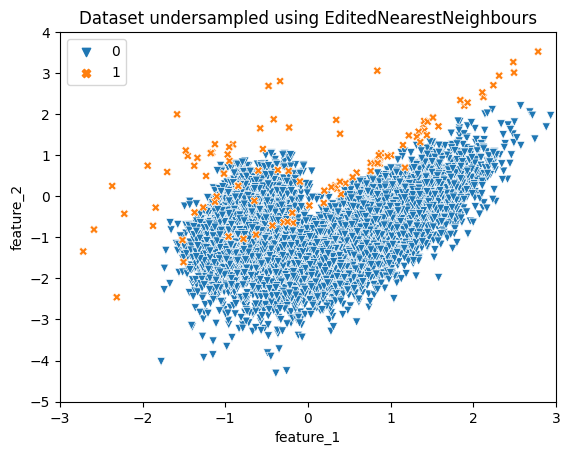

In [5]:
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours(sampling_strategy='auto', n_neighbors=3, kind_sel='all')
X_res, y_res = enn.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

plot_dataset(X_res, y_res, 'Dataset undersampled using EditedNearestNeighbours')

The king might run **ENN** type of policy for few days. Each day he will calculate the nearest neighbors for the Capulets in the morning. And remove the Capulets who have one or more Montague as neighbors in the evening.

#Repeated Edited Nearest Neighbors(RENN)
we repeat the process followed in ENN until there are no more samples that are removed or the maximum number of cycle count has been reached. This algorithm also removes the noisy data. It is stronger in removing the boundary samples as the algorithm is repeated several times.

Resampled dataset shape Counter({0: 9739, 1: 100})
0    9739
1     100
dtype: int64


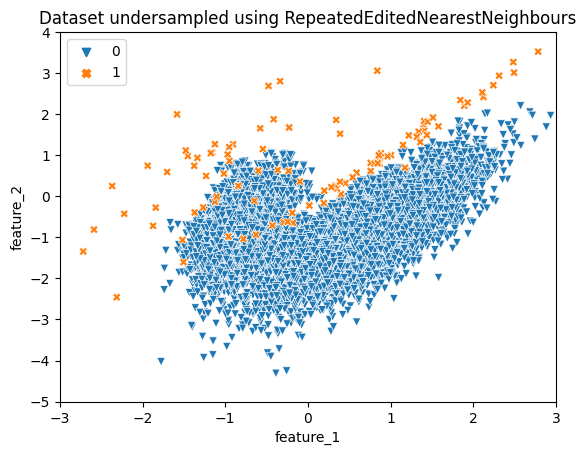

In [6]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
renn = RepeatedEditedNearestNeighbours(sampling_strategy='auto', n_neighbors=3, kind_sel='all', max_iter=200)
X_res, y_res = renn.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

plot_dataset(X_res, y_res, 'Dataset undersampled using RepeatedEditedNearestNeighbours')

# AllKNN. 
In this method, we repeat **ENN** but with the number of neighbors going from 1 to K. The code of AllKNN is as follows:

Resampled dataset shape Counter({0: 9764, 1: 100})
0    9764
1     100
dtype: int64


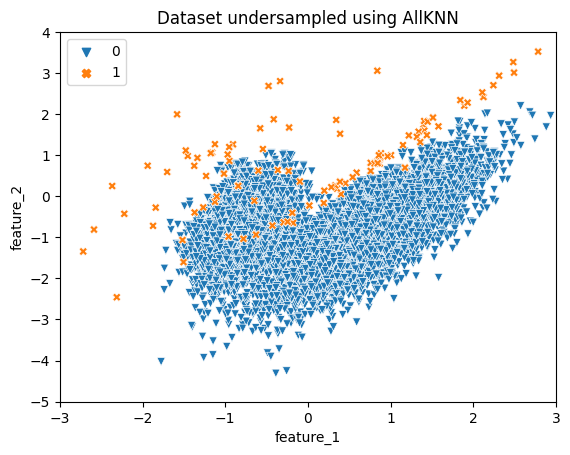

In [7]:
from imblearn.under_sampling import AllKNN
renn = AllKNN(sampling_strategy='auto', n_neighbors=3, kind_sel='all')
X_res, y_res = renn.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

plot_dataset(X_res, y_res, 'Dataset undersampled using AllKNN')

# Tomek links

In 1976, Ivan Tomek proposed the idea of Tomek links. Two points are said to form Tomek links if they belong to two different classes and there is no third point with a shorter distance to them than the distance between the two points. The intuition behind Tomek links is that “If two points are from different classes, they should not be nearest to each other.” These points are part of the noise and we can eliminate the majority member or both points to reduce noise. This is as if, the king decides to remove Capulets whose best friend is a Montague.

Resampled dataset shape Counter({0: 9875, 1: 100})
0    9875
1     100
dtype: int64


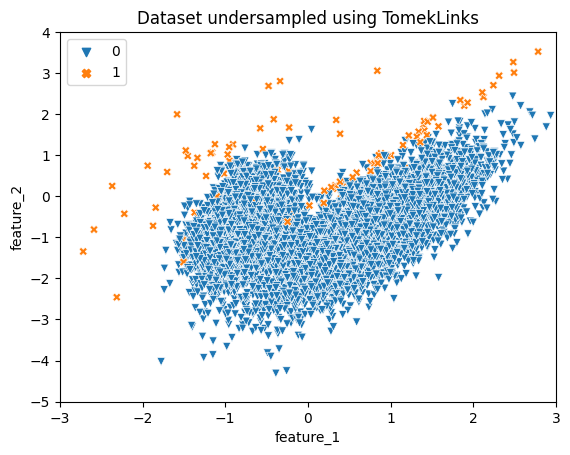

In [8]:
from imblearn.under_sampling import TomekLinks
tklinks = TomekLinks(sampling_strategy='auto')
X_res, y_res = tklinks.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

plot_dataset(X_res, y_res, 'Dataset undersampled using TomekLinks')

# Neighborhood cleaning rule

On top of removing Capulets whose one or more nearest neighbors are Montague. The king might decide to look at the nearest neighbors of Montagues and remove the Capulets, who might come up as one of the nearest neighbors for a Montague. In Neighborhood Cleaning Rule(NCR), we apply an ENN algorithm, train a KNN on the remaining data, and then remove all the majority class samples that are the nearest neighbors of the minority samples.  

Resampled dataset shape Counter({0: 9773, 1: 100})
0    9773
1     100
dtype: int64


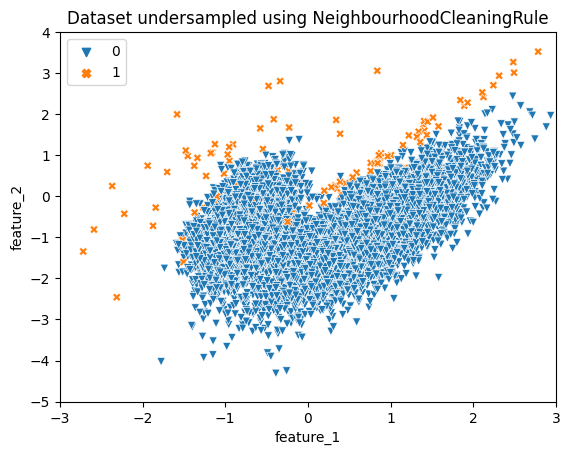

In [9]:
from imblearn.under_sampling import NeighbourhoodCleaningRule
ncr = NeighbourhoodCleaningRule(sampling_strategy='auto', n_neighbors=3, threshold_cleaning=0.5)
X_res, y_res = ncr.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

plot_dataset(X_res, y_res, 'Dataset undersampled using NeighbourhoodCleaningRule')

# Instance hardness

The king might ask a minister, "Which Capulets have mixed well with Montagues?" The minister based on their knowledge of the town will give a list of those Capulets. And then the king will remove the Capulets whose names are on the list. This method of using another model to identify noisy samples is known as Instance Hardness. In this method, we train a classification model on the data, like, Decision Tree, Random Forest, Linear SVM, etc. In addition to predicting the class of an instance, these classifiers can return their class probabilities. Class probabilities show the confidence the model has in classifying the instances. With Instance Hardness Threshold we remove the majority-class samples that have a low-class probability. These instances are harder to classify and are part of the noise.  

Resampled dataset shape Counter({0: 9178, 1: 100})
0    9178
1     100
dtype: int64


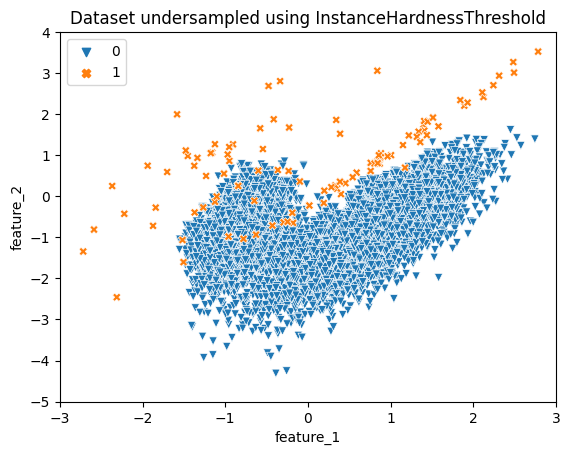

In [10]:
from imblearn.under_sampling import InstanceHardnessThreshold
nm = InstanceHardnessThreshold(sampling_strategy='auto')
X_res, y_res = nm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

plot_dataset(X_res, y_res, 'Dataset undersampled using InstanceHardnessThreshold')

## Strategies for removing easy observations

The reverse of the strategy to remove the rich and famous Capulets is to remove the poor and weak Capulets. As discussed earlier, the reverse of a good strategy is also a good strategy. This section will discuss the techniques for removing the majority samples far away from the minority samples. Instead of removing the samples from the boundary between the two classes, we use them for training a model. This way, we can train a model that can better discriminate between the classes. As a downside, these models increase the noise in the data. 

### Condensed nearest neighbors

Condensed Nearest Neighbors is an algorithm that works as follows:
- We add all minority samples to a set and one randomly selected majority sample. Let's call this set C.
- We train a KNN model with k = 1.
- Now, we repeat the following four steps for each of the remaining majority samples.
    - We consider one majority sample; let's call it `e`.
    - And try to predict the class of `e` using the KNN.
    - If the predicted class matches the original class, we ignore the sample. The intuition is there is not much to learn from `e` as even a 1-NN classifier can learn it.
    - Otherwise, we add the sample to our set C and again train the 1-NN on C.

This method removes the easy-to-classify samples from the majority class.

Resampled dataset shape Counter({0: 198, 1: 100})
0    198
1    100
dtype: int64


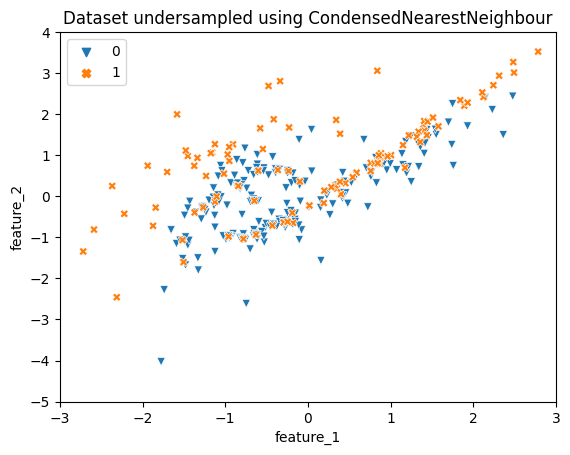

In [11]:
from imblearn.under_sampling import CondensedNearestNeighbour 
cnn = CondensedNearestNeighbour(random_state=42) 
X_res, y_res = cnn.fit_resample(X, y) 
print('Resampled dataset shape %s' % Counter(y_res))

plot_dataset(X_res, y_res, 'Dataset undersampled using CondensedNearestNeighbour')

## One sided selection

The king might decide to remove some rich and many poor Capulets. This way, only the middle-class Capulets will stay in the town. In One sided selection we do just that. This method is the combination of Condensed nearest neighbors and Tomek links. We first resample using a Condensed Nearest Neighbor. Then we remove the Tomek links from the resampled data. This technique makes a compromise between the two types of strategies discussed in the previous two sections. It reduces both noisy and easy-to-identify samples.

Here is the code for `OneSidedSelection`. When we don't provide `n_neighbors` parameter, the default value of `1` is taken.

Resampled dataset shape Counter({0: 9645, 1: 100})
0    9645
1     100
dtype: int64


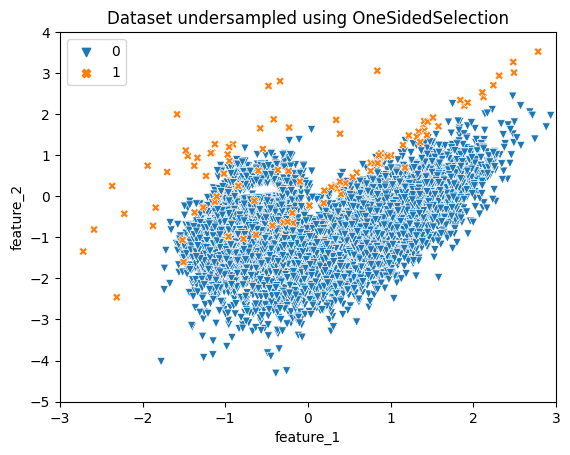

In [12]:
from imblearn.under_sampling import OneSidedSelection 
oss = OneSidedSelection(random_state=0)
X_res, y_res = oss.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

plot_dataset(X_res, y_res, 'Dataset undersampled using OneSidedSelection')